## Module 5 Project

### Project Goals & Dataset Description

This project aims to study whether a customer will reamin a customer or close their bank account. This is also known as churn. The dataset is taken from Kaggle and contains 14 features. The target variable is a binary varaible that predicts whether or not a customer remains (0) or the customer closes their account (1).

With the advent of new online-only banks and bank accounts customers are quickly ditching traditional banks and moving to online-only banks so they can bank exclusively on their mobile phones, tablets, and computers and reap other benefits. The number of online-only banks is growing, and they are working to make the customer experience easier than ever. Therefore, traditional banks may be losing customers to these new banks. They will need to innovate and target customers that might be at risk of closing accounts. To remain viable, traditional banks will need to retain as many customers as possible. 

This project aims to use classification and regression algorithms to determine which features most affect the incidence of customer exit from a bank. However, other techniques may be employed as needed.

Features in this dataset are as follows:

- **Customer ID** - arbitrary customer identifier                                                                           
- **Surname** - Last name of the customer                                                                                   
- **Credit Score** - Customer Credit Score                                                                                 
- **Geography** - Customer locations (France, Spain, Germany)                                                               
- **Gender** - Male/Female                                                                                                 
- **Age** - Customer age                                                                                                   
- **Tenure** - Number of years with bank                                                                                   
- **Balance** - Current customer balance                                                                                   
- **Number of Products** - Number of bank products per customer                                                             
- **Has Credit Card** - Binary yes/no if customer has credit card                                                           
- **Is Active Member** - Binary yes/no whether the customer is an active member with the bank                               
- **Estimated Salary** - Customer salary estimate in USD$                                                             
  

- **Exited - Target Variable** - Binary Yes/No if customer left bank


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import ADASYN, SMOTE
from collections import Counter

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
def draw_missing_data_table(df):
    """function to print a table to display null value counts 
    and percentages for each feature. Takes a DataFrame as df."""
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

draw_missing_data_table(data)

,Total,Percent
Exited,0,0.0
EstimatedSalary,0,0.0
IsActiveMember,0,0.0
HasCrCard,0,0.0
NumOfProducts,0,0.0
Balance,0,0.0
Tenure,0,0.0
Age,0,0.0
Gender,0,0.0
Geography,0,0.0


It appears that there are no null values in any features of the dataset. Therefore we will not have to clean a large amount before attempting to model.

Number of Customers who remained: 7963
Number of Customers who exited: 2037
% Remained 79.63 %
% Exited 20.37 %


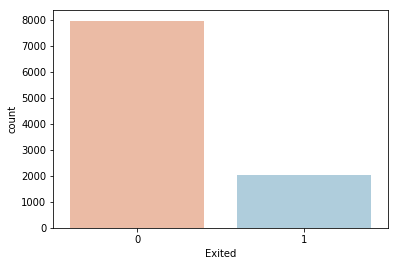

In [9]:
remained, exited = data.Exited.value_counts()
print('Number of Customers who remained:', remained)
print('Number of Customers who exited:', exited)

print('% Remained', round(remained / len(data) * 100, 2), '%')
print('% Exited', round(exited / len(data) * 100, 2), '%')

sns.countplot(data.Exited, palette='RdBu')

There seems to be a large class imbalance, therefore some preprocessing will be necessary. In order to balance the classes, SMOTE or ADASYN will be used to oversample the minority class 'Exited'. 

### Feature Removal and Engineering

- Some features in the dataset contain information that will not aid in modeling the customer churn. This includes features such as Surname, CustomerID and RowNumber which contain information that is customer specific and arbitrary. For the purposes of simplicity and modeling, these will be removed.

In [10]:
columns = ['Surname', 'CustomerId', 'RowNumber']
data.drop(columns=columns, inplace=True)
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


- Now that irrelevant information has been removed, the next step is to treat categorical features with one-hot encoding. This will allow the categorical variables in 'Geography' and 'Gender' to be encoded into a pseudo-continuous variable type. This will allow for better modelling further on.

Some other questions arise when looking at this data:
- When was this sample taken? It appears as if it is a snapshot in time
- If a customer has exited, how can they still have a balance, unless this is balance prior to exit.
- What does IsActiveMember refer to?
- To what does NumOfProducts refer, what qualifies as a product? 

### Exploratory Data Analysis

Here we will investigate data trends and traits to see if there are any observable and interesting features to model.

Text(0, 0.5, 'Probability Density')

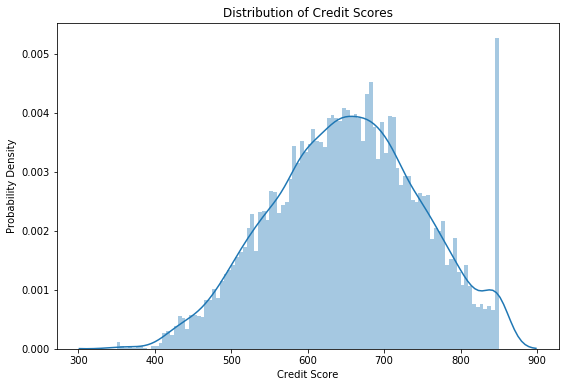

In [11]:
#plotting credit score distribution
plt.figure(figsize=(9,6))
sns.distplot(data.CreditScore, kde=True,bins = 100)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Probability Density')

- Here we can see that there is an approximately normal distribution of the data pertaining to credit scores. However, there is an anomalous peak at 850 which is considered a 'perfect' score. This might explain why there are many customers clustered around this value. The figure below also displays the distribution of credit score without the grouping at 850 and here we can see a much more normal distribution.

Text(0, 0.5, 'Probability Density')

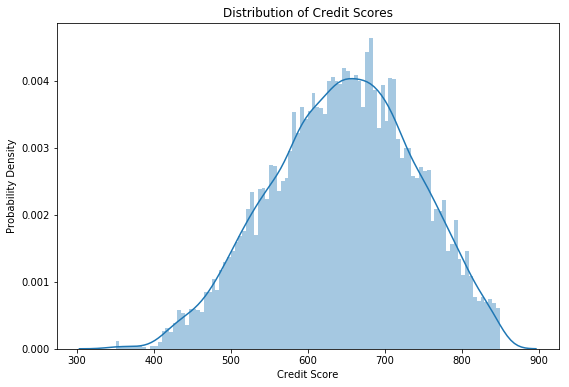

In [12]:
#plotting distribution of Credit Score with 850 removed. 
cred_score_removed = data[data.CreditScore != 850]
plt.figure(figsize=(9,6))
sns.distplot(cred_score_removed.CreditScore, kde=True,bins = 100)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

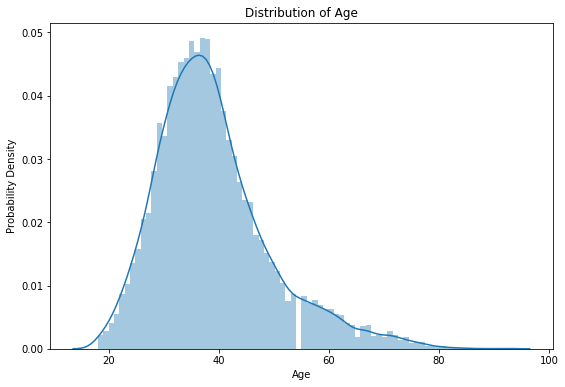

In [13]:
#plotting distribtion of ages
plt.figure(figsize=(9,6))
sns.distplot(data.Age,bins=76) #max(age) - min(age) = 76
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Probability Density')

- Here we can see that Age is approximately normally distributed, however, there is also an obvious skew towards the higher ages. This could be due to the dearth of customers with an age lower than 18, because they are not legally allowed to hold an account with that bank.

Text(0, 0.5, 'Probability Density')

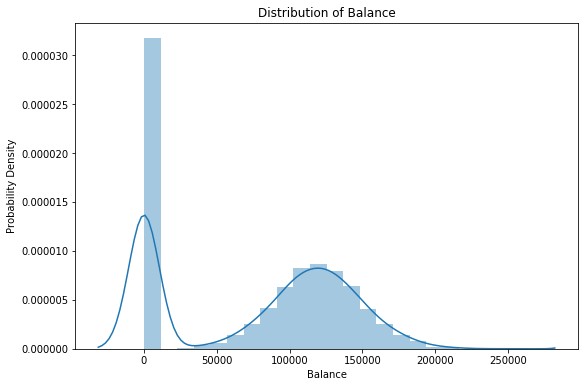

In [54]:
#plotting balance distribution
plt.figure(figsize=(9,6))
sns.distplot(data.Balance, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Probability Density')

- Above is the distribution of Total Account Balance. There seems to be a normal distribution when disregarding the instance of 0s which results in a secondary false peak. 
- To better understand the data, the 0s will be removed and the balance distribution plotted again. Below we can see the distribution of account balance without the large outlier group at 0. It indicates a normal distribution of the account balances.

Text(0, 0.5, 'Probability Density')

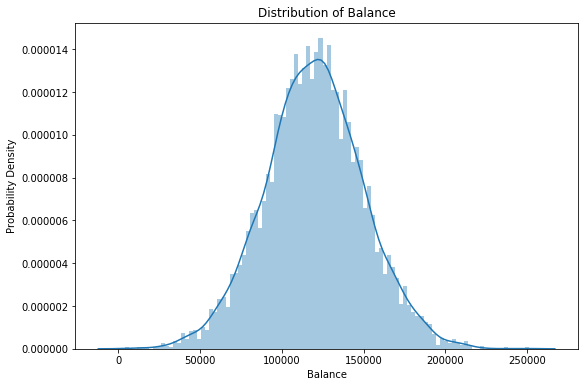

In [15]:
baladist = data[data.Balance != 0] #removing all 0 values in the Balance column

plt.figure(figsize=(9,6))
sns.distplot(baladist.Balance, kde=True, bins=100)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Probability Density')

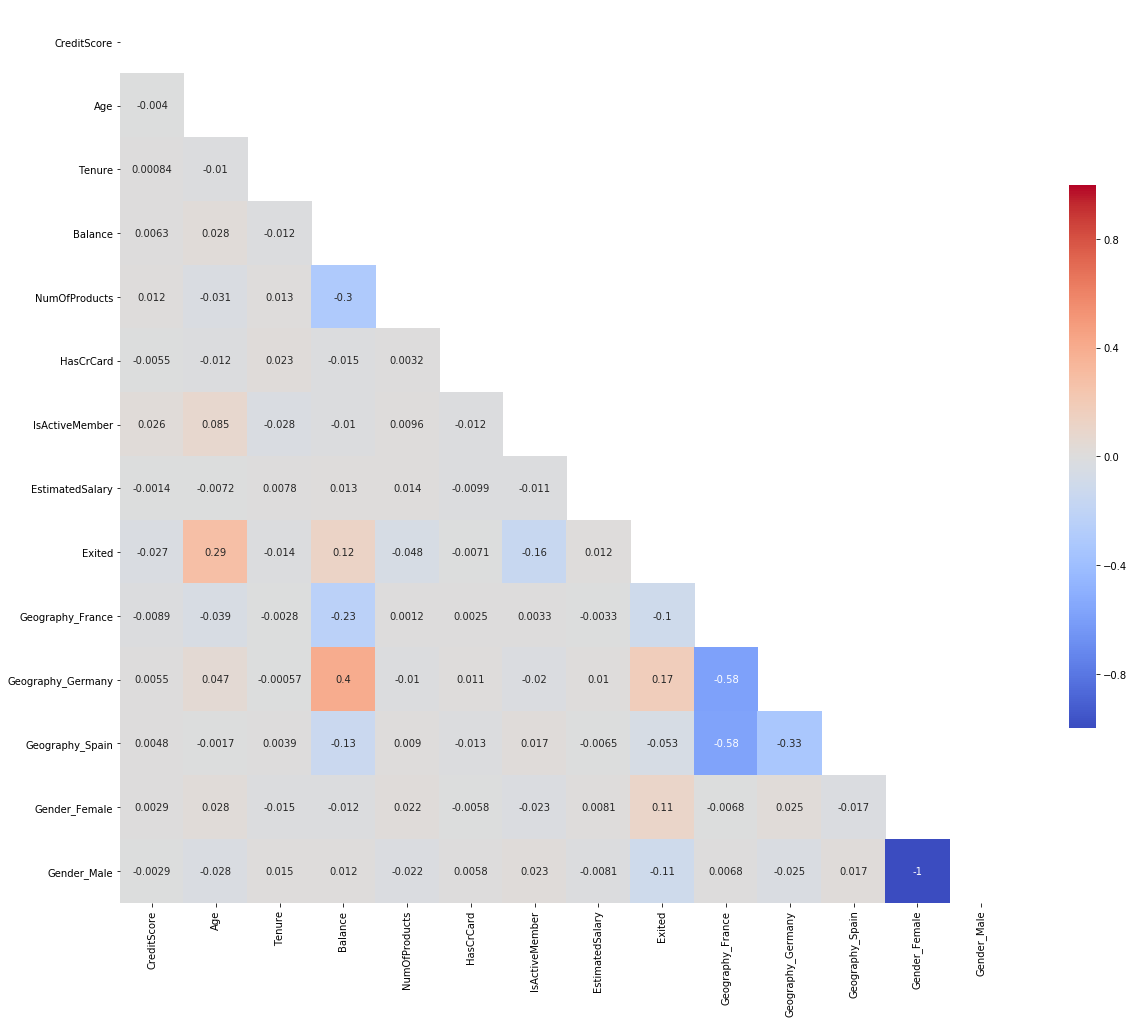

In [55]:
#looking for multicollinearity in the data with a correlation heatmap
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, mask=mask, 
            cmap = 'coolwarm', annot = True, 
            cbar_kws={"shrink": .5}, square=True)

- From this visualization above, we can see that there is no strong multicollinearity between features. The only notably strong multicollinearity arises between geography, with Germany and Spain showing correlations of -0.58 with France. There is another somewhat noteable correlation between 'Balance' and 'Germany', may assumption is that customers from Germany may hold a higher account balance in general, hence the correlation. 

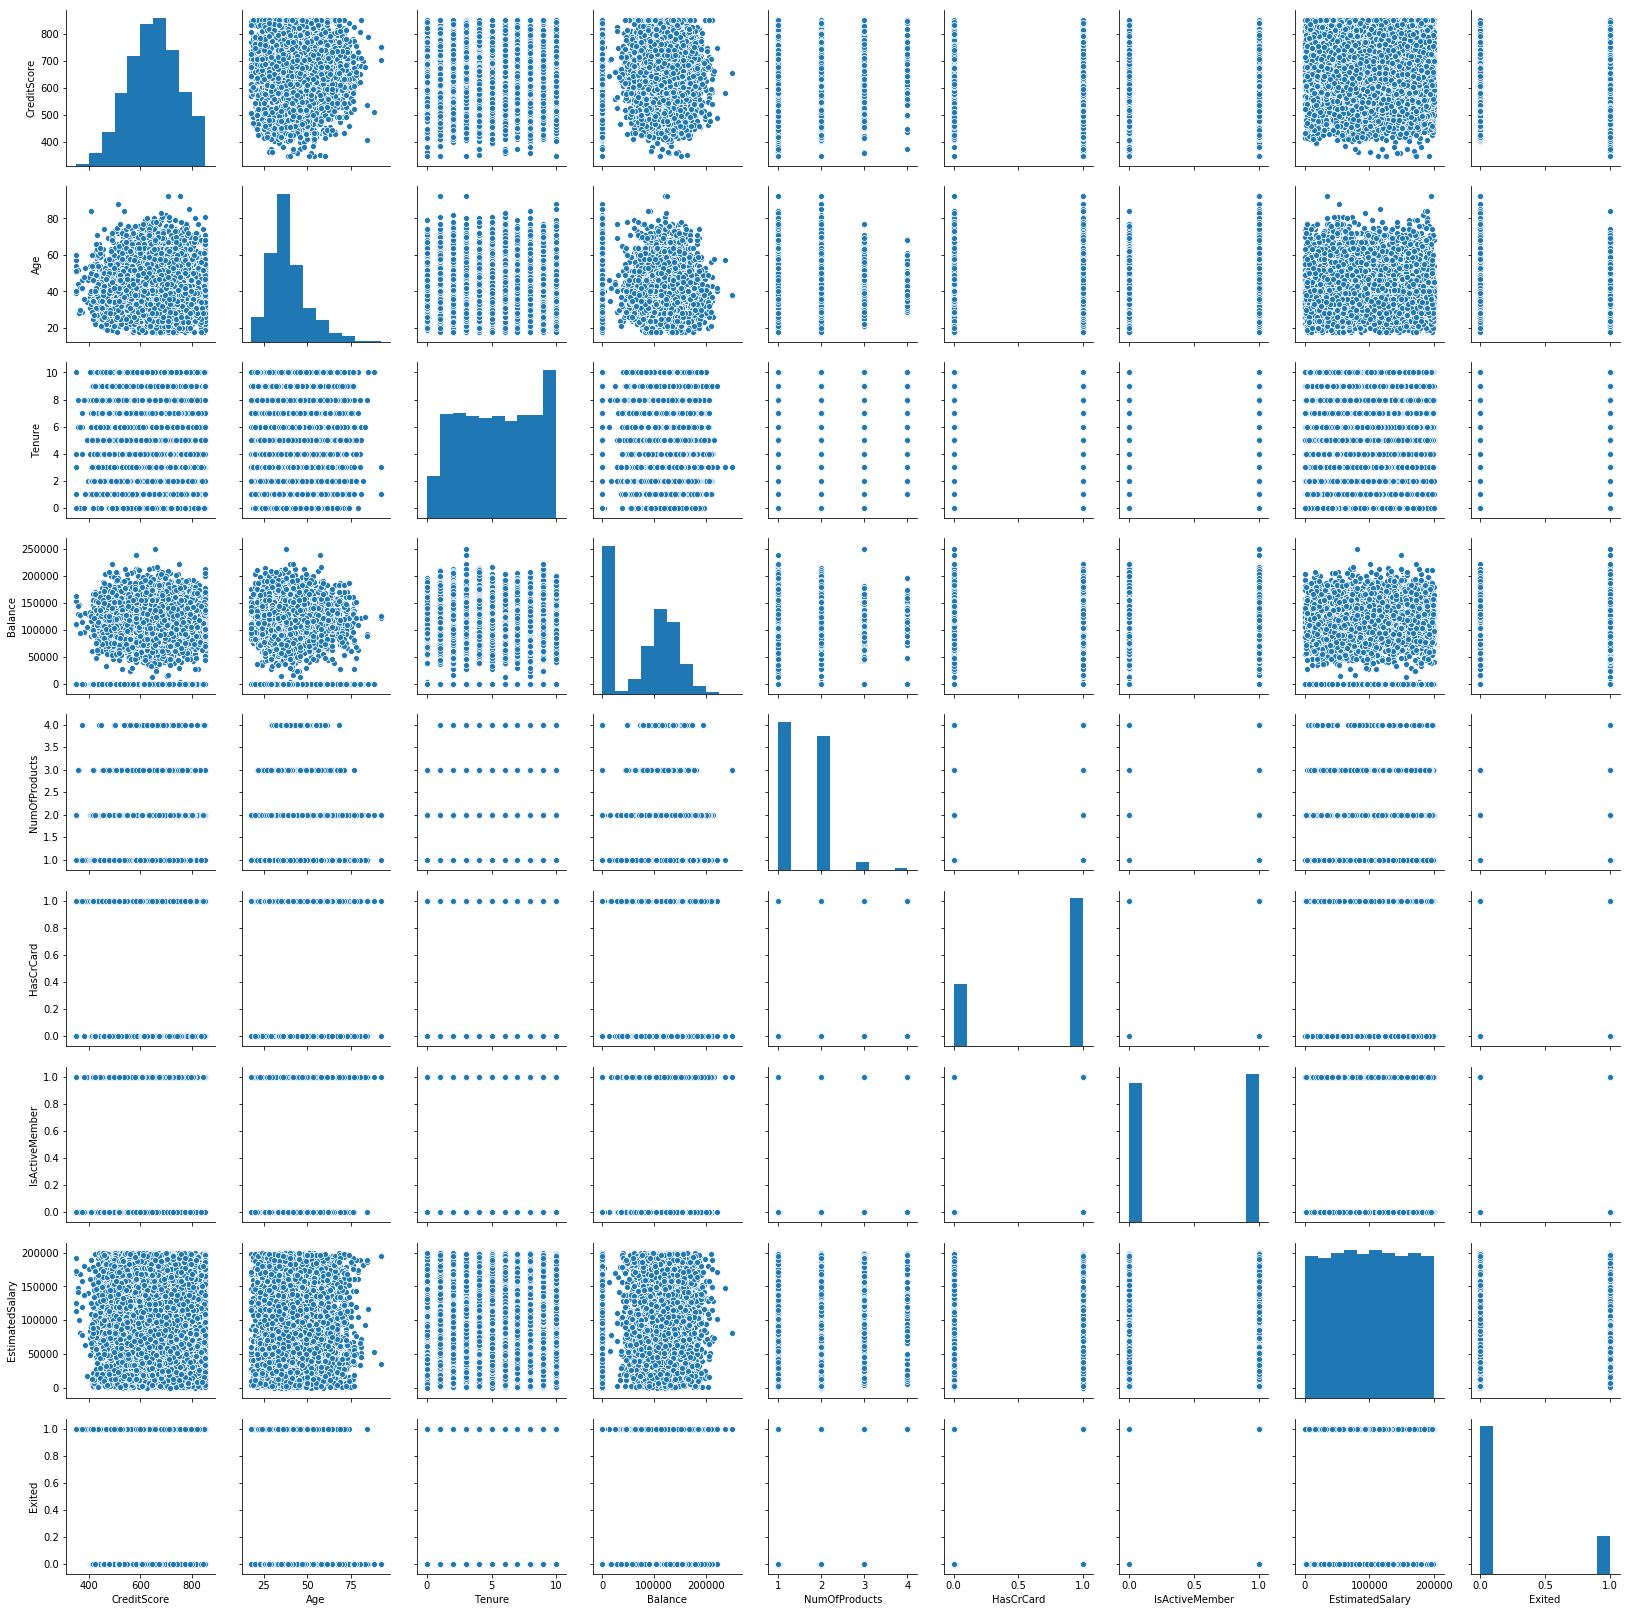

In [17]:
sns.pairplot(data=data, palette='RdBu')

- Above we can see that there are no strong linear relationships between features, this is also confirmed by the correlation plot above, where no strong correlation is indicated.

Text(0.5, 1.0, 'Active Member Proportions')

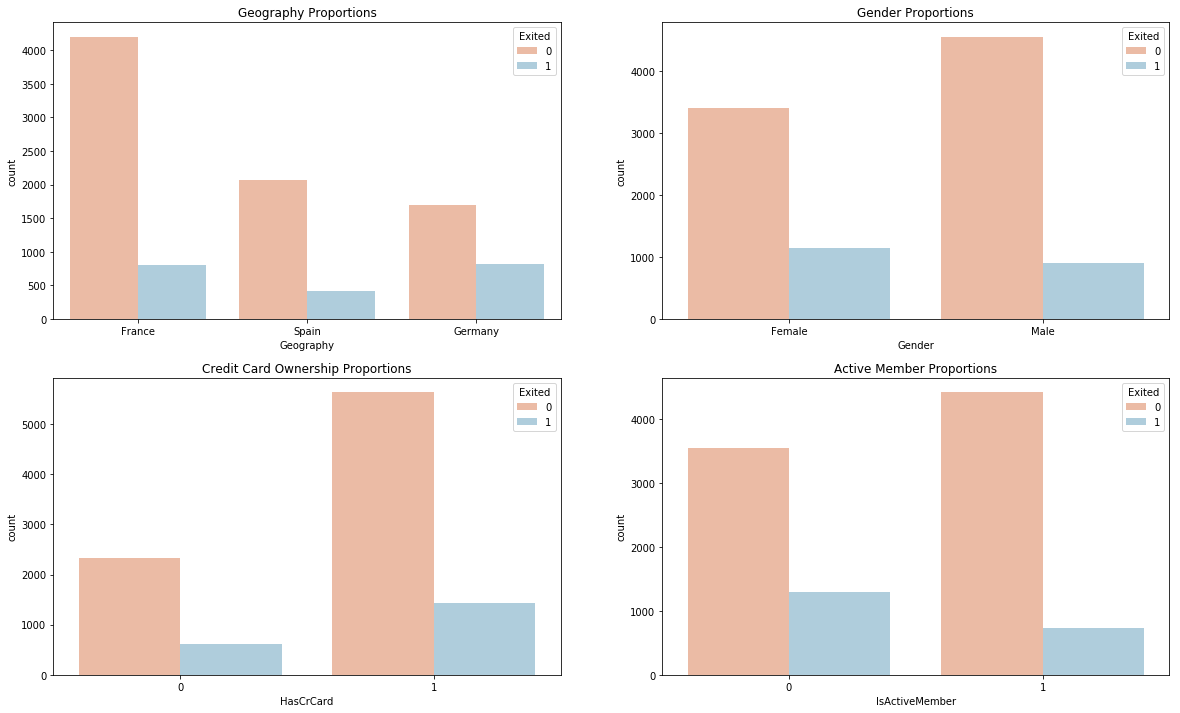

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue = 'Exited',data = data, palette= 'RdBu', ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, palette= 'RdBu', ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, palette= 'RdBu', ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, palette= 'RdBu', ax=axarr[1][1])

axarr[0][0].set_title('Geography Proportions')
axarr[0][1].set_title('Gender Proportions')
axarr[1][0].set_title('Credit Card Ownership Proportions')
axarr[1][1].set_title('Active Member Proportions')

Text(0.5, 1.0, 'Number of Products ')

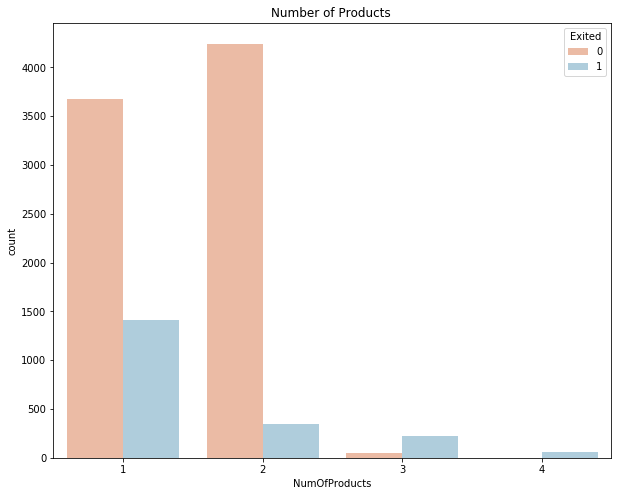

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(x='NumOfProducts', hue = 'Exited',data = data, palette= 'RdBu')
plt.title('Number of Products ')

Above are some graphic relationships between those that exited and those that did not, within specific groups:

   - As we can see, the majority of customers are from France, additionally, the proportion of those that exited in Germany and Spain, was much higher, this leads me to believe that this is a French bank and that it is not focusing of customers from abroad as much as it should.
   - The proportion of females who exited is also much higher than males, despite the relatively smaller group. 
   - From the dataset, it is not clear what IsActiveMember refers to, however, my assumption is that this refers to the recent activity of a member in their account. This might explain why those that are not active have a higher proportion of exits. The bank also has quite a high number of inactive members, this group can certainly be one that is targeted to reduce churn.
   - Those that are inactive have a much higher proportion of exits than active members
   


Number of 0 Balance Customers who remained: 7963
Number of 0 Balance Customers who exited: 2037
% Remained 86.18 %
% Exited 13.82 %
Number of Customers who remained: 7963
Number of Customers who exited: 2037
% Remained 79.63 %
% Exited 20.37 %


Text(0.5, 1.0, 'Exited with 0 Balance Proportions')

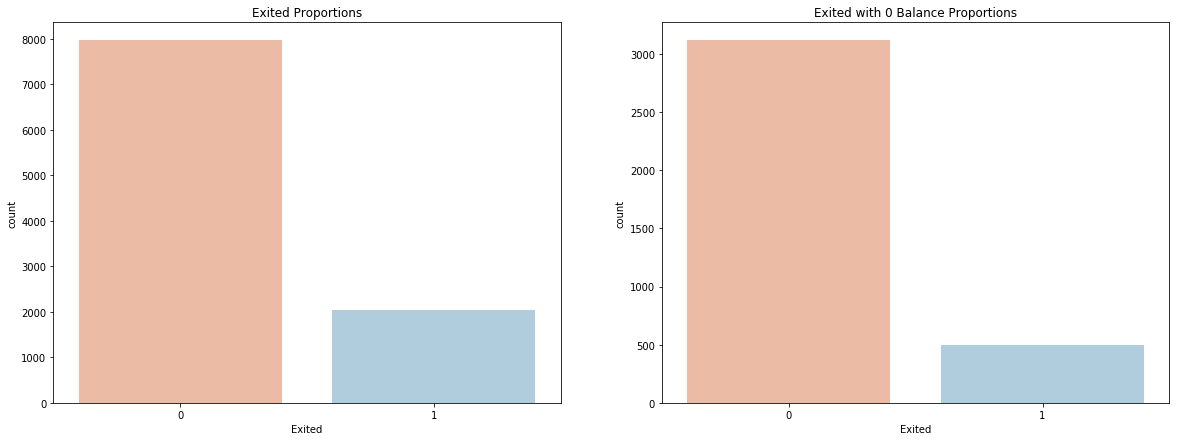

In [20]:
remained_0, exited_0 = data[data['Balance'] == 0].Exited.value_counts()
print('Number of 0 Balance Customers who remained:', remained)
print('Number of 0 Balance Customers who exited:', exited)

print('% Remained', round(remained_0 / len(data[data['Balance'] == 0]) * 100, 2), '%')
print('% Exited', round(exited_0 / len(data[data['Balance'] == 0]) * 100, 2), '%')

remained, exited = data.Exited.value_counts()
print('Number of Customers who remained:', remained)
print('Number of Customers who exited:', exited)

print('% Remained', round(remained / len(data) * 100, 2), '%')
print('% Exited', round(exited / len(data) * 100, 2), '%')


fig, axarr = plt.subplots(1, 2, figsize=(20, 7))
sns.countplot(data.Exited, palette='RdBu', ax=axarr[0])
sns.countplot(data[data['Balance'] == 0].Exited, palette='RdBu', ax=axarr[1])

axarr[0].set_title('Exited Proportions')
axarr[1].set_title('Exited with 0 Balance Proportions')

- Somewhat unexpectedly, there is a lower proportion of customers who exited with a 0 balance than the total dataset proportion. This would mean that the bank doesn't need to focus on these customers in order to reduce churn.

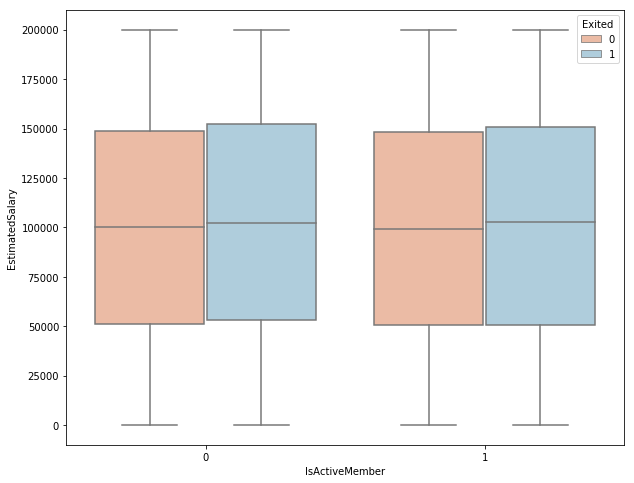

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'EstimatedSalary',x = 'IsActiveMember', palette= 'RdBu', hue = 'Exited',data = data)

Text(0.5, 1.0, 'Balance Profiles')

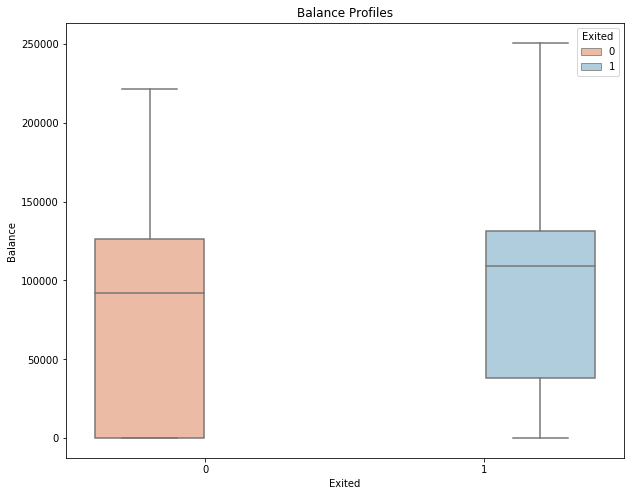

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(y= 'Balance',x = 'Exited', palette= 'RdBu', hue = 'Exited',data = data)
plt.title('Balance Profiles')

### Correcting Class Imbalance

Number of Customers who remained: 7963
Number of Customers who exited: 2037
% Remained 79.63 %
% Exited 20.37 %


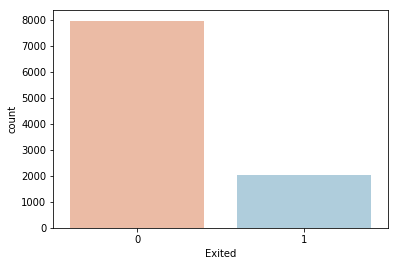

In [23]:
remained, exited = data.Exited.value_counts()
print('Number of Customers who remained:', remained)
print('Number of Customers who exited:', exited)

print('% Remained', round(remained / len(data) * 100, 2), '%')
print('% Exited', round(exited / len(data) * 100, 2), '%')

sns.countplot(data.Exited, palette='RdBu')

In [24]:
#one-hot encoding to create dummy variables in categoric classes
data = pd.get_dummies(data)

In [25]:
#Define X and y for the resampling below

Xpre = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']]
ypre = data['Exited']

- Due to the imbalanced nature of the classes, which gives more weight to the majority class, we must attempt to oversample the minority class using the SMOTE or ADASYN technique.

### Modeling

In [27]:
#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(Xpre, ypre, test_size=0.25)

#initialize ADASYN model and fit/resample the data
ada = ADASYN(random_state=42)
X_train, y_train = ada.fit_resample(X_train,y_train)

print('Resampled dataset shape %s' % Counter(ypre))
#scale the data before running any modeling
scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

scaled_df_train = pd.DataFrame(scaled_train, columns=Xpre.columns)
scaled_df_train.head()

Resampled dataset shape Counter({0: 7963, 1: 2037})


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-1.427391,0.376607,1.114447,-1.304368,0.801072,0.694135,1.159197,-1.112622,1.120734,-0.689778,-0.574595,1.082652,-1.082652
1,0.369819,0.475856,0.746272,0.775495,-0.840992,0.694135,1.159197,-0.656270,-0.998833,-0.689778,1.950187,-1.052665,1.052665
2,0.994459,1.865345,-0.358253,-1.304368,-0.840992,0.694135,1.159197,-0.845871,-0.998833,-0.689778,1.950187,-1.052665,1.052665
3,0.632825,0.277357,-1.094603,1.716130,0.801072,0.694135,-0.980451,-0.607943,-0.998833,1.600518,-0.574595,1.082652,-1.082652
4,0.095854,0.277357,0.378097,-0.061694,-0.840992,0.694135,-0.980451,-0.372041,1.120734,-0.689778,-0.574595,-1.052665,1.052665


### KNN Classifier Model

In [28]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    """Function to calculate the best value for k in a K-Nearest-Neighbours model.
    Edit values for min_k and max_k as necessary and input ready split and normalized data."""
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
find_best_k(scaled_train, y_train, scaled_test, y_test)

Best Value for k: 37
F1-Score: 0.5441819772528433


In [29]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(scaled_train,y_train)
test_preds = knn.predict(scaled_test)

def print_metrics(labels, preds):
    """Function to print classifier metrics. Input true test labels and model predictions."""
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.47764227642276424
Recall Score: 0.47
Accuracy Score: 0.7912
F1 Score: 0.4737903225806452


### Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn import tree 

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [31]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train,y_train) 
y_pred = clf2.predict(X_test)

In [32]:
print_metrics(y_test, y_pred)

Precision Score: 0.4981481481481482
Recall Score: 0.538
Accuracy Score: 0.7992
F1 Score: 0.5173076923076924


In [35]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2,5,10,12,15], 'min_samples_split': [2,4]} 
gridsearch = GridSearchCV(estimator= clf2, cv= 3, param_grid= param_grid)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 12, 15],
                

In [36]:
gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

In [37]:
gridsearch.best_score_

0.8456712672521958

In [38]:
clf3 = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_split= 2)
clf3.fit(X_train,y_train) 
y_pred = clf3.predict(X_test)

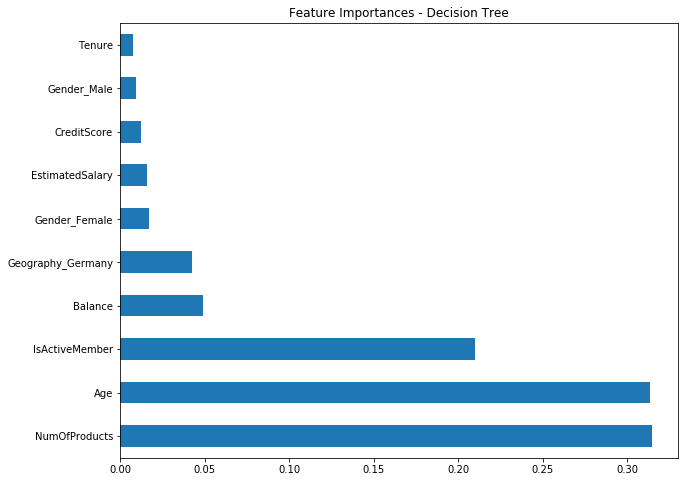

In [58]:
feat_importances = pd.Series(clf3.feature_importances_, index=Xpre.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances - Decision Tree')

- Above is a bar chart displaying the relative importances of features to the predictive model. In this case the largest two predictors were NumOfProducts and Age. 

### Random Forest Classifier

In [40]:
randclf = RandomForestClassifier()
param_grid = {'n_estimators': [80,90,100],'criterion': ['gini', 'entropy'], 'max_depth': [15,17,20], 'min_samples_split': [2,4]} 
gridsearch = GridSearchCV(estimator= randclf, cv= 3, param_grid= param_grid)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [41]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_split': 4,
 'n_estimators': 90}

In [42]:
randclf1 = RandomForestClassifier(criterion= 'gini', max_depth= 15, min_samples_split= 4, n_estimators= 80)
randclf1.fit(X_train,y_train) 
y_pred = randclf1.predict(X_test)

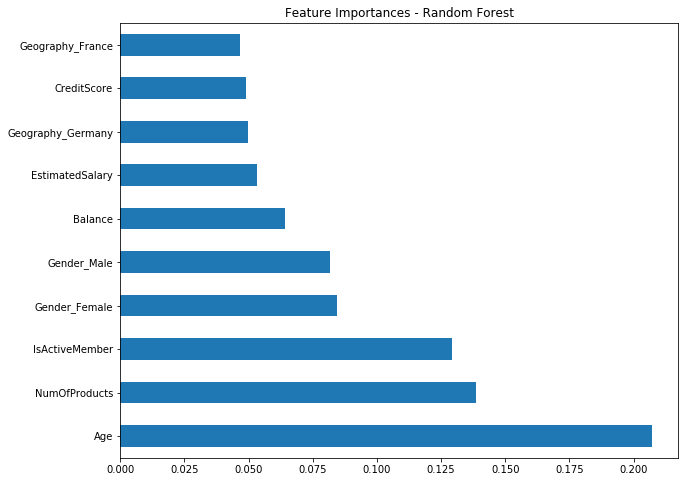

In [57]:
feat_importances = pd.Series(randclf1.feature_importances_, index=Xpre.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances - Random Forest')

In [44]:
print_metrics(y_test, y_pred)

Precision Score: 0.6836158192090396
Recall Score: 0.484
Accuracy Score: 0.852
F1 Score: 0.566744730679157


### Gradient Boosting Classifier

In [45]:
gradboo = GradientBoostingClassifier()
param_grid = {'loss': ['deviance','exponential'],'n_estimators': [100,150], 'max_depth': [2,3,5], 'min_samples_split': [2,4]} 
gridsearch = GridSearchCV(estimator= gradboo, cv= 3, param_grid= param_grid)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [46]:
gridsearch.best_params_

{'loss': 'deviance',
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [47]:
gradboo1 = GradientBoostingClassifier(loss= 'exponential', max_depth= 2,
 min_samples_split= 2,
 n_estimators= 100)
gradboo1.fit(X_train,y_train) 
y_pred = gradboo1.predict(X_test)

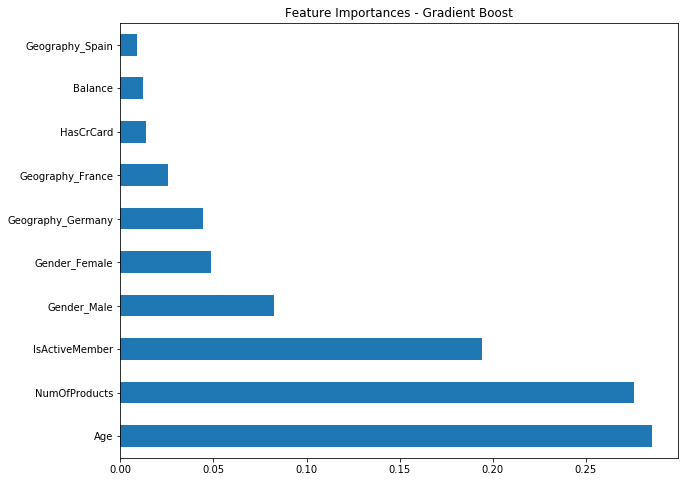

In [56]:
feat_importances = pd.Series(gradboo1.feature_importances_, index=Xpre.columns)
plt.figure(figsize= (10,8))
feat_importances.nlargest(10).plot(kind='barh', title= 'Feature Importances - Gradient Boost')

In [49]:
print_metrics(y_test, y_pred)

Precision Score: 0.6557788944723618
Recall Score: 0.522
Accuracy Score: 0.8496
F1 Score: 0.5812917594654788


### XGBoost Classifier

In [50]:
import xgboost as xgb

In [52]:
Xtrain_data = np.array(X_train)
ytrain_data = np.array(y_train)
ytest_data = np.array(y_test)
Xtest_data = np.array(X_test)

XG = xgb.XGBClassifier(booster='gbtree')
XG.fit(Xtrain_data, ytrain_data)
training_preds = XG.predict(Xtrain_data)
val_preds = XG.predict(Xtest_data)
training_accuracy = accuracy_score(ytrain_data, training_preds)
val_accuracy = accuracy_score(ytest_data, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 91.11%
Validation accuracy: 85.64%
